In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Loading dataset
file_path = "heart.csv"  
df = pd.read_csv(file_path)

In [ ]:
# Displaying dataset information
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [ ]:
# Checking for missing values
print("\nMissing values in dataset:\n", df.isnull().sum())



Missing values in dataset:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
#descriptive statistics 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


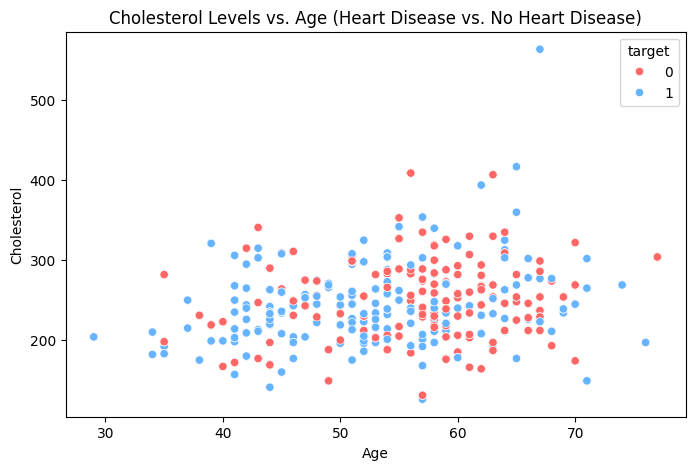

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['chol'], hue=df['target'], palette=['#ff6666','#66b3ff'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Cholesterol Levels vs. Age (Heart Disease vs. No Heart Disease)')
plt.show()


C:\Users\amitp\AppData\Local\Temp\ipykernel_11452\2241809893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='thalach', data=df, palette='coolwarm')


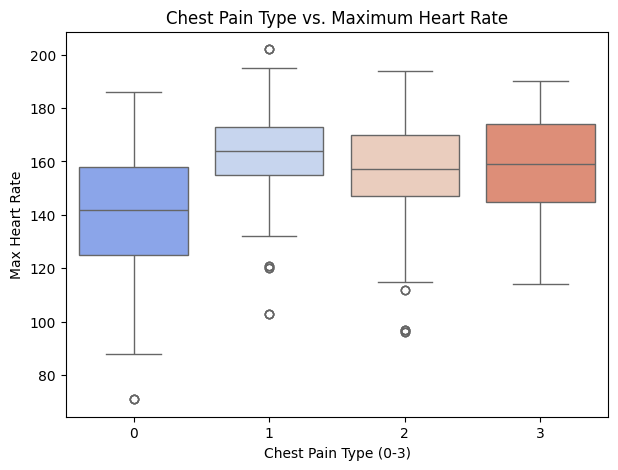

In [26]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='cp', y='thalach', data=df, palette='coolwarm')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Max Heart Rate')
plt.title('Chest Pain Type vs. Maximum Heart Rate')
plt.show()


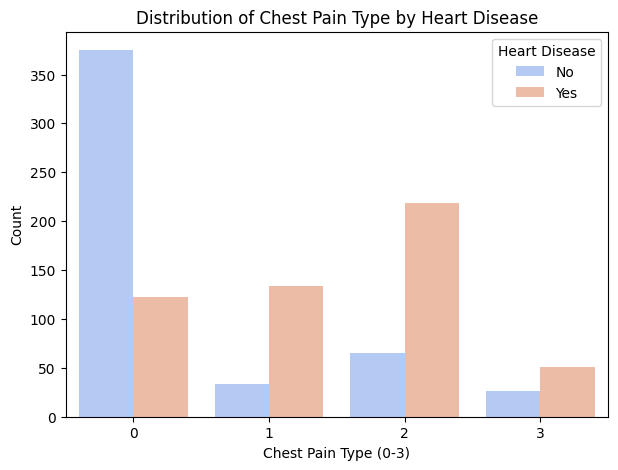

In [29]:
plt.figure(figsize=(7, 5))
sns.countplot(x='cp', hue='target', data=df, palette='coolwarm')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type by Heart Disease')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()



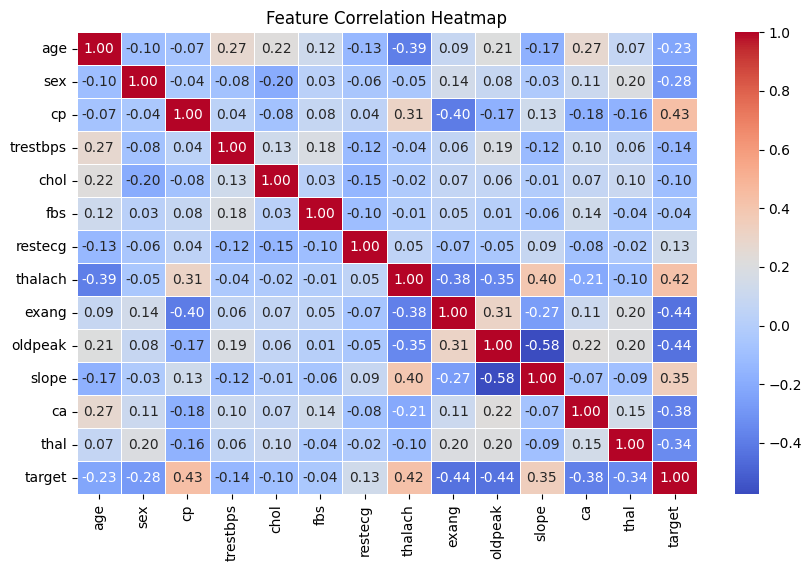

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


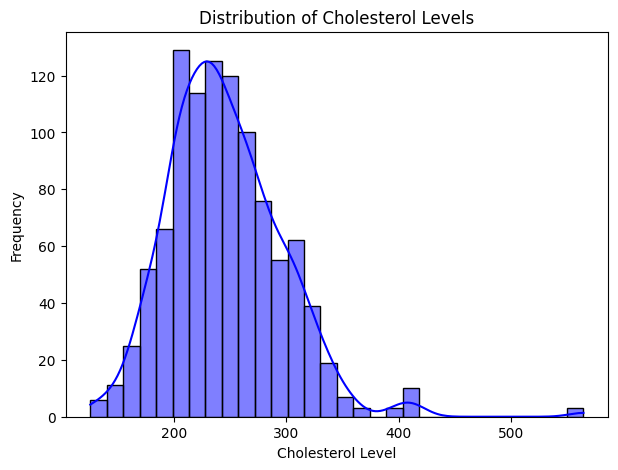

In [31]:
plt.figure(figsize=(7, 5))
sns.histplot(df['chol'], bins=30, kde=True, color='blue')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol Levels')
plt.show()


C:\Users\amitp\AppData\Local\Temp\ipykernel_11452\795705150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='thalach', data=df, palette=['#ff6666','#66b3ff'])


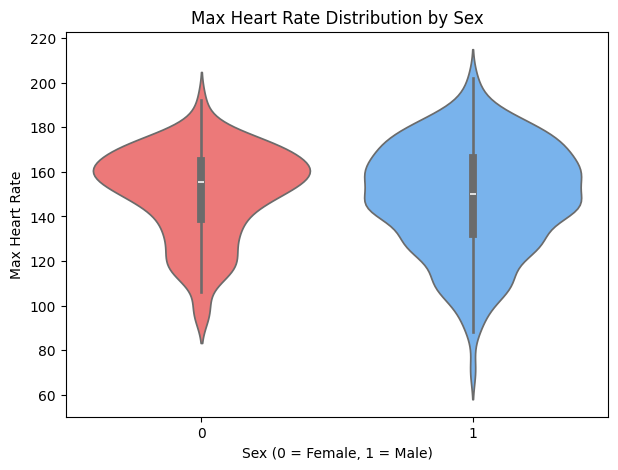

In [32]:
plt.figure(figsize=(7, 5))
sns.violinplot(x='sex', y='thalach', data=df, palette=['#ff6666','#66b3ff'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Max Heart Rate')
plt.title('Max Heart Rate Distribution by Sex')
plt.show()


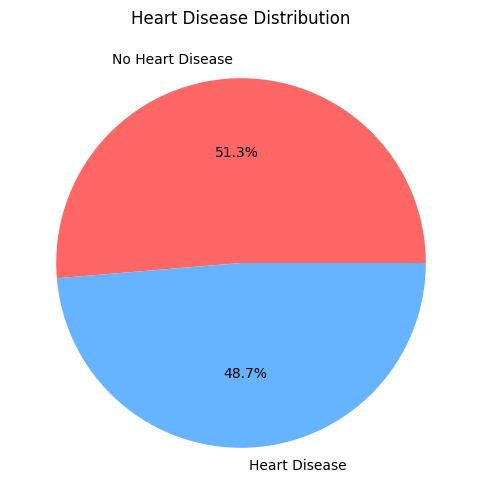

In [33]:
plt.figure(figsize=(6, 6))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff6666', '#66b3ff'], labels=['No Heart Disease', 'Heart Disease'])
plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.show()


C:\Users\amitp\AppData\Local\Temp\ipykernel_11452\2770787365.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == 0]['trestbps'], label='No Heart Disease', shade=True, color='red')
C:\Users\amitp\AppData\Local\Temp\ipykernel_11452\2770787365.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == 1]['trestbps'], label='Heart Disease', shade=True, color='blue')


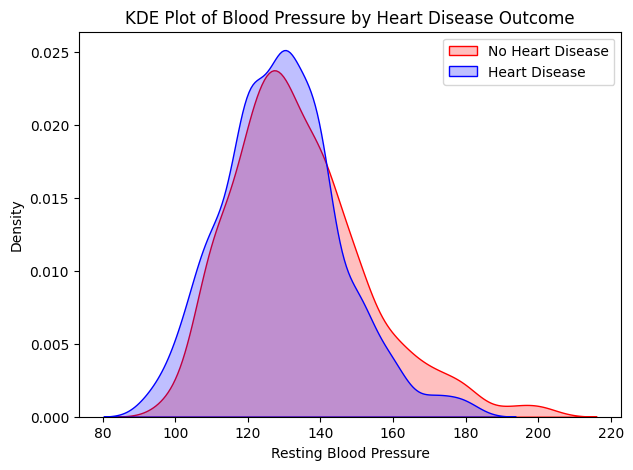

In [34]:
plt.figure(figsize=(7, 5))
sns.kdeplot(df[df['target'] == 0]['trestbps'], label='No Heart Disease', shade=True, color='red')
sns.kdeplot(df[df['target'] == 1]['trestbps'], label='Heart Disease', shade=True, color='blue')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Density')
plt.title('KDE Plot of Blood Pressure by Heart Disease Outcome')
plt.legend()
plt.show()


C:\Users\amitp\AppData\Local\Temp\ipykernel_11452\2188707464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='oldpeak', data=df, palette=['#ff6666','#66b3ff'])


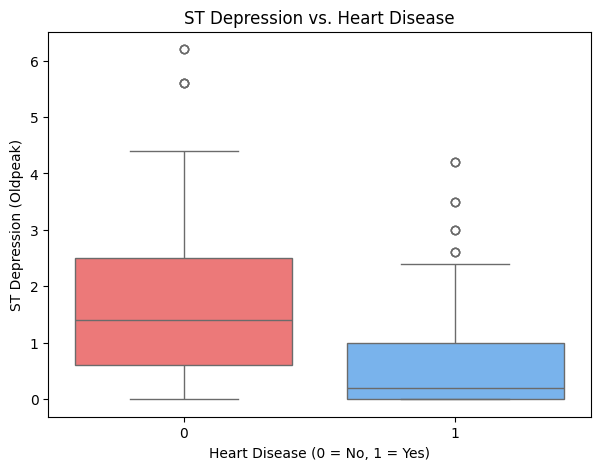

In [35]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='target', y='oldpeak', data=df, palette=['#ff6666','#66b3ff'])
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('ST Depression (Oldpeak)')
plt.title('ST Depression vs. Heart Disease')
plt.show()


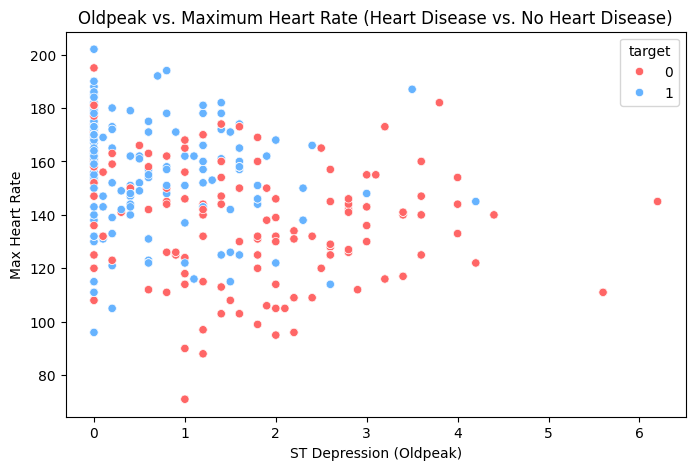

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['oldpeak'], y=df['thalach'], hue=df['target'], palette=['#ff6666','#66b3ff'])
plt.xlabel('ST Depression (Oldpeak)')
plt.ylabel('Max Heart Rate')
plt.title('Oldpeak vs. Maximum Heart Rate (Heart Disease vs. No Heart Disease)')
plt.show()


In [6]:
# Splitting into features and target
X = df.drop(columns=['target'])  # Assuming 'target' is the label
y = df['target']

In [7]:
# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Building the Deep Neural Network (Feedforward Neural Network)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Prevents overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


c:\Users\amitp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5762 - loss: 0.6684 - val_accuracy: 0.7756 - val_loss: 0.5218
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.4596 - val_accuracy: 0.7902 - val_loss: 0.4421
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8595 - loss: 0.3640 - val_accuracy: 0.8000 - val_loss: 0.4267
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8568 - loss: 0.3557 - val_accuracy: 0.8098 - val_loss: 0.4163
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8633 - loss: 0.3264 - val_accuracy: 0.8146 - val_loss: 0.4110
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8559 - loss: 0.3388 - val_accuracy: 0.8146 - val_loss: 0.3977
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.3325 - val_accuracy: 0.8146 - val_loss: 0.3892
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8905 - loss: 0.2897 - val_accuracy: 0.8244 - val_loss:

In [ ]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9427 - loss: 0.1170 

Test Accuracy: 0.9561
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       102
           1       0.97      0.94      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



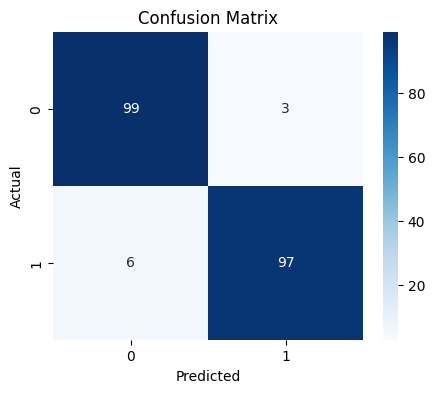

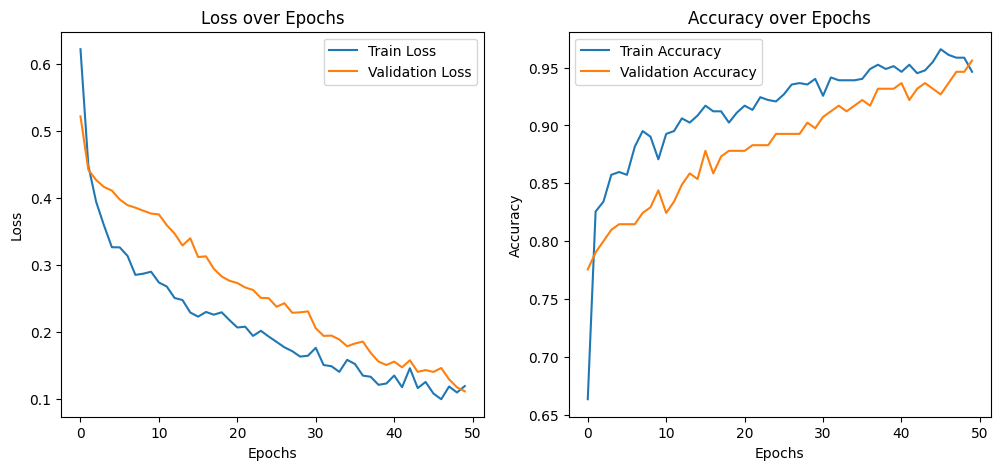

In [11]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Training Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

In [12]:
# Import necessary libraries
from tensorflow.keras.layers import LSTM, Reshape

Epoch 1/50


c:\Users\amitp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6299 - loss: 0.6837 - val_accuracy: 0.7902 - val_loss: 0.6067
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8455 - loss: 0.5403 - val_accuracy: 0.8049 - val_loss: 0.4253
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8391 - loss: 0.3553 - val_accuracy: 0.8146 - val_loss: 0.4220
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8934 - loss: 0.3014 - val_accuracy: 0.8098 - val_loss: 0.4159
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8827 - loss: 0.3228 - val_accuracy: 0.8293 - val_loss: 0.4125
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8819 - loss: 0.2844 - val_accuracy: 0.8341 - val_loss: 0.4029
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9135 - loss: 0.2448 - val_accuracy: 0.8293 - val_loss: 0.3888
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8993 - loss: 0.2779 - val_accuracy: 0.8439 - val_loss: 0.3821
Ep

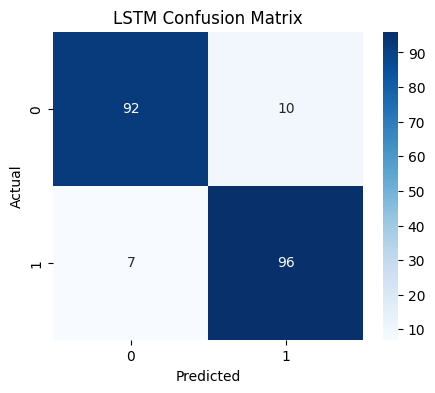

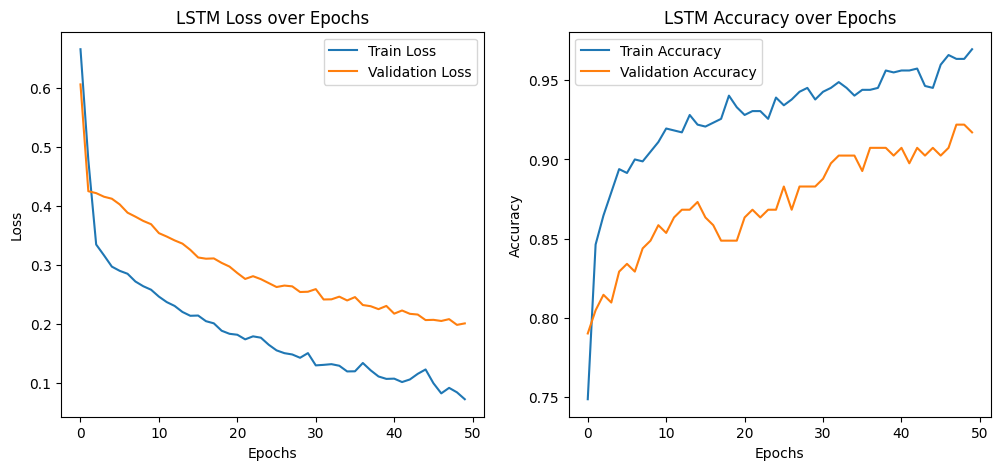

In [13]:

# Reshape input for LSTM (LSTMs expect 3D input: samples, time steps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test), epochs=50, batch_size=16, verbose=1)

# Evaluate LSTM model
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_lstm, y_test)
print(f"\nLSTM Test Accuracy: {lstm_acc:.4f}")

# Predictions
lstm_y_pred = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

# Classification Report
print("\nLSTM Classification Report:\n", classification_report(y_test, lstm_y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, lstm_y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LSTM Confusion Matrix")
plt.show()

# Plot Training Loss and Accuracy for LSTM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Accuracy over Epochs')
plt.legend()
plt.show()


In [14]:
# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Display first 10 predictions
print("Predicted Labels:\n", y_pred[:10].flatten())


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predicted Labels:
 [1 1 0 1 0 1 0 0 1 0]


In [15]:
# Example new sample (Replace with actual values)
new_sample = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # Example input

# Predict probability
new_sample_pred_prob = model.predict(new_sample)

# Convert probability to binary label
new_sample_label = int(new_sample_pred_prob > 0.5)

print(f"\nPredicted Label for New Sample: {new_sample_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Predicted Label for New Sample: 0


C:\Users\amitp\AppData\Local\Temp\ipykernel_11452\1243548994.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_sample_label = int(new_sample_pred_prob > 0.5)


In [16]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print evaluation metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       102
           1       0.97      0.94      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205


Confusion Matrix:
 [[99  3]
 [ 6 97]]

Accuracy Score: 0.9560975609756097


In [17]:
# Predict probabilities
lstm_y_pred_probs = lstm_model.predict(X_test_lstm)

# Convert probabilities to binary labels (0 or 1)
lstm_y_pred = (lstm_y_pred_probs > 0.5).astype("int32")

# Display first 10 predictions
print("LSTM Predicted Labels:\n", lstm_y_pred[:10].flatten())


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
LSTM Predicted Labels:
 [1 1 0 1 0 1 0 0 1 0]


In [18]:
# Example new sample (Replace with actual values)
new_sample_lstm = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # Example input

# Reshape to match LSTM input format (samples, time steps, features)
new_sample_lstm = new_sample_lstm.reshape((1, 1, new_sample_lstm.shape[1]))

# Predict probability
new_sample_lstm_pred_prob = lstm_model.predict(new_sample_lstm)

# Convert probability to binary label
new_sample_lstm_label = int(new_sample_lstm_pred_prob > 0.5)

print(f"\nLSTM Predicted Label for New Sample: {new_sample_lstm_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

LSTM Predicted Label for New Sample: 0


C:\Users\amitp\AppData\Local\Temp\ipykernel_11452\2427691008.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_sample_lstm_label = int(new_sample_lstm_pred_prob > 0.5)


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print evaluation metrics
print("\nLSTM Classification Report:\n", classification_report(y_test, lstm_y_pred))
print("\nLSTM Confusion Matrix:\n", confusion_matrix(y_test, lstm_y_pred))
print("\nLSTM Accuracy Score:", accuracy_score(y_test, lstm_y_pred))



LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       102
           1       0.91      0.93      0.92       103

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205


LSTM Confusion Matrix:
 [[92 10]
 [ 7 96]]

LSTM Accuracy Score: 0.9170731707317074
